In [1]:
from qiskit import * 
from qiskit import Aer
from qiskit.aqua import QuantumInstance
from qiskit.aqua.operators import Z
from qiskit.aqua.operators.state_fns import StateFn, CircuitStateFn
from qiskit.aqua.operators.expectations import PauliExpectation, AerPauliExpectation
from qiskit.aqua.operators.converters import CircuitSampler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
%matplotlib inline

In [2]:
nqubits = 6 # 量子ビット数
sv = 2**nqubits # 状態数
t = 3.0 # ダイナミクスをシミュレーションする時間
M = 100 # トロッター分解の分割数
delta = t/M # 時間の刻み幅
h = 3 # 外部磁場

In [3]:
def get_expectation_val(psi, op):
    # define your backend or quantum instance
    backend = Aer.get_backend('qasm_simulator') 
    q_instance = QuantumInstance(backend, shots=1024)
    
    # define the state to sample
    measurable_expression = StateFn(op, is_measurement=True).compose(psi) 

    # convert to expectation value
    expectation = PauliExpectation().convert(measurable_expression)  
#     expectation = AerPauliExpectation().convert(measurable_expression)

    # get state sampler (you can also pass the backend directly)
    sampler = CircuitSampler(q_instance).convert(expectation) 

    # evaluate
    return sampler.eval().real

6ビットの初期状態を入力してください。重ね合わせは'+'。(例:000+)
000000


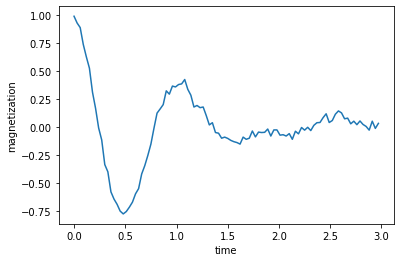

In [4]:
#回路の準備
circuit_trotter_transIsing = QuantumCircuit(nqubits)

# 初期状態の準備
print("{}ビットの初期状態を入力してください。重ね合わせは'+'。(例:000+)".format(nqubits))
b_str = input()  # 入力ビットのバイナリ列
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        circuit_trotter_transIsing.x(qubit)
    elif b_str[qubit] == '+':
        circuit_trotter_transIsing.h(qubit)

arr = [] #結果を格納する配列
    
# 計算
for s in range(M):
    # トロッター分解の1回分、
    for i in range(nqubits):
        circuit_trotter_transIsing.cx(i,(i+1)%nqubits)
        circuit_trotter_transIsing.rz(-2*delta,(i+1)%nqubits)
        circuit_trotter_transIsing.cx(i,(i+1)%nqubits)
        circuit_trotter_transIsing.rx(-2*delta*h, i)
    
    # 磁化の期待値を求める
    psi = CircuitStateFn(circuit_trotter_transIsing)
    op = Z
    result = get_expectation_val(psi, op)
    #状態ベクトルの保存
    arr.append(result)

# 磁化ダイナミクス表示
x = [i*delta for i in range(M)]

plt.xlabel("time")
plt.ylabel("magnetization")
plt.plot(x, arr)
plt.show()